# Homework 1

You will turn in this notebook without any of the data files. We will *not* run your code, all cells must be executed and the notebook saved with output included.

All of the **Problem** cells serve as markers. We will use them to divide all of the submitted notebooks into new notebooks that contain ONLY answers to one problem at a time. **Do not move or edit the Problem cells**. Always put your answers in the provided code or markdown cells.

Debugging tip: Python error messages are terrible! It can be scary and confusing to see hundreds of lines of errors pop up. **Most of the error is just *smoke*. Ignore it and scroll to the bottom to find the *fire*.**

If you get stuck for more than 30 minutes on one problem when working alone, ask a TA or post on Ed Discussion. If you are working with others, ask if you get stuck for more than 15 minutes. 

## Part 1: Discussion question

As a data scientist, you'll be asked to build various tools and systems all the time. While you might be *capable* of performing these tasks, it's always worth asking yourself: should you?

Below is a list of scenarios. In each case, answer the discussion question: **If you were to build this system, how might its use affect people (be it positively or negatively)?**

### Scenarios
1. You work for an e-commerce site that wants to direct customers to items they would be interested in, to avoid serving customers irrelevant ads. You've been asked to build a advertisement system that recommends products to customers based on a variety of attributes, including their self-reported gender.

This might be complicated or marginalise groups who are genderfluid or don't conform to gender norms or a gender binary. So I don't think it's a good idea. 


1. You work for a news site that lives or dies from ad revenue. Advertisers don't want their ads next to "controversial" news items. You've been asked to build a classifier for "touchy subjects".

Might result in a lot of bias because touchy subjects is super subjective, so no I would not implement it. 

1. You work for a public health agency that wants to identify people exposed to a disease for testing. You've been asked to build a system that will trace phone locations and estimate proximity between individuals to infer exposure. 
I consider this a big invasion of personal privacy although it sounds effective in terms of the goal. I dont think it's ethical to implement. 

1. You work for a university that wants to identify students having difficulties with stress and mental health. You've been asked to build a system that will keep track of where students are on campus, including dorms, dining halls, and classrooms.

Big invasion of personal privacy again so no I would not implement it. 

*(Note: all of these scenarios are based on true stories!)*

## Part 2: Programming

Read through the entire assignment during the Friday session. Make sure that you have a good idea of how to solve them before you leave.



The goals of these problems are:

* Develop intuitions for mean and variance
* Practice applying numpy functions for 2D arrays
* Explore the relationship between sample and population mean and variance
* Merge tables for real data
* Generate histograms and compare them to summary statistics


In [47]:
## this code cell is also marked as 'narrative'
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns

import duckdb, sqlalchemy

In [2]:
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

---

## Problem 1 (10 pts)
Do not move or modify this cell, we use it for automated homework analysis.

In the code cell below:

* Use `linspace` to create an array called `one_to_five` of 10 numbers starting at 1.0 and ending at 5.0.
* Print the array to make sure that you got this right.
* Print the mean and variance of this array.

---

In [3]:
# put your code for Problem 1 in this cell

one_to_five = np.linspace(1.0, 5.0, num=10)


print(one_to_five)
print(np.mean(one_to_five)) 
print(np.var(one_to_five))

[1.         1.44444444 1.88888889 2.33333333 2.77777778 3.22222222
 3.66666667 4.11111111 4.55555556 5.        ]
3.0
1.6296296296296293


---

## Problem 2 (10 pts)

In the code cell below:

* Use `numpy` broadcasting to create an array `two_to_six` that is the previous array plus 1.0. (Do not use a `for` loop.)
* Print the array to make sure that you got this right.
* Print the mean and variance of this array.
* Use `numpy` broadcasting to create an array `three_to_seven` that is the first array plus 2.0. (Do not use a `for` loop.)
* Print the array to make sure that you got this right.
* Print the mean and variance of this array.

In the text cell below the code cell, describe in words what happens to mean and variance when you add a constant.

---

In [4]:
# Put your code for problem 2 here
two_to_six = one_to_five + 1
print(two_to_six)
print(np.mean(two_to_six)) 
print(np.var(two_to_six))

three_to_seven = one_to_five + 2
print(three_to_seven)
print(np.mean(three_to_seven)) 
print(np.var(three_to_seven))




[2.         2.44444444 2.88888889 3.33333333 3.77777778 4.22222222
 4.66666667 5.11111111 5.55555556 6.        ]
4.0
1.6296296296296293
[3.         3.44444444 3.88888889 4.33333333 4.77777778 5.22222222
 5.66666667 6.11111111 6.55555556 7.        ]
5.0
1.6296296296296293


**Put your description of the effect of adding a constant here**

the variance stays the same, but the mean changes depending on the constant-- in this case it increased by the contstant that was added to all the numbers. so: two_to_six's mean was increased by +1 and three_to_seven's mean increased by +2 

---
## Problem 3 (10 pts)

In the code cell below:

* Use `numpy` broadcasting to create an array `two_to_ten` that is the first array times 2.0. (Do not use a `for` loop.)
* Print the array to make sure that you got this right.
* Print the mean and variance of this array.
* Use `numpy` broadcasting to create an array `three_to_fifteen` that is the first array times 3.0. (Do not use a `for` loop.)
* Print the array to make sure that you got this right.
* Print the mean and variance of this array.

In the text cell below the code cell, describe in words what happens to mean and variance when you multiply by a constant.

---

In [5]:
two_to_ten = (one_to_five)*2 
print(two_to_ten)
print(np.mean(two_to_ten)) 
print(np.var(two_to_ten))

three_to_fifteen = (one_to_five)*3 
print(three_to_fifteen)
print(np.mean(three_to_fifteen)) 
print(np.var(three_to_fifteen))




[ 2.          2.88888889  3.77777778  4.66666667  5.55555556  6.44444444
  7.33333333  8.22222222  9.11111111 10.        ]
6.0
6.518518518518517
[ 3.          4.33333333  5.66666667  7.          8.33333333  9.66666667
 11.         12.33333333 13.66666667 15.        ]
9.0
14.666666666666668


**Describe the effects of adding here**

the mean becomes mupltiplied by this constant (c) and the variance is muplied by (c)^2 

---

## Problem 4 (10 pts)

In real data we usually can't observe the "true" population mean and variance. *Simulation* is the process of generating artificial samples from a known distribution. It's a powerful tool for describing the properties of samples given properties of a distribution.

For this problem you will generate a large number of small samples from a Normal distribution. We'll construct a single large array 2D array where each column will represent one sample.

The function `np.random.normal(0, 1, (5, 10))` will create a sample from a Normal distribution with a population mean of 0 and population standard deviation 1.0. The sample will have 50 elements, in 5 rows and 10 columns.

Use this function to create a sample called `normal_samples` with 10 rows and 100 columns, with mean 5.0 and standard deviation 1.0 (this is the special case where variance is also equal to 1.0).

Use the `mean` function with the `axis` parameter to calculate the mean of each column. Print the string `"column sample means"` and then print these values.

Then print the string `"mean of means"` and print the mean of the array of means.

**Confidence check: the means should be an array of 100 numbers that are within about 0.5 of 5.0**

Use the `var` function with the `axis` parameter to calculate the variance of each column. Print the string `"column sample variances"` and then print these values.

Then print the string `"mean of variances"` and print the mean of the array of variances.

By default, numpy's `var` function gives you the mean of the squared distances to the sample mean (dividing by $N$). Print the string `"mean of variances (N-1)"` and print the mean of the array of variances *multiplied by the quantity $N$ divided by $N-1$).

---

In [43]:
normal_samples = np.random.normal(5, 1, (10, 100))
print("column sample means")
column_sample_means = (normal_samples.mean(0)) 
print(column_sample_means) 
print("mean of means")
mean_of_means = np.mean(column_sample_means)
print (mean_of_means)

column_sample_variances = normal_samples.var(0) 
print ("column sample variances")
print (column_sample_variances)
print ("mean of variances")
print (np.mean(column_sample_variances))
print ("mean of variances (N-1)") 
print (np.mean(column_sample_variances)*10/9)

column sample means
[4.75705498 5.19100349 4.74184854 4.58737045 5.09438505 5.5864227
 4.54899156 4.82922177 4.78280732 5.28175092 5.74195932 5.05331179
 5.13675675 4.67365349 4.63443924 4.31869213 4.63684397 4.8677192
 4.94190814 5.0440894  5.09350943 5.00100421 5.25552021 4.59259814
 5.03054422 5.17918705 4.64733911 5.02005669 5.40628475 4.88245932
 4.35352738 4.74912468 5.15666076 4.66163831 4.89099203 5.2664241
 5.03745704 4.90441626 5.07826055 3.92813252 5.21980866 4.97810872
 4.96618831 5.03113923 5.4669809  5.46999572 4.78442933 4.56242973
 4.32887104 4.76717753 4.88734187 4.85042279 4.81179714 5.13876745
 5.3314549  4.62332123 5.20899122 5.03085619 4.88430914 5.26661871
 5.15629071 4.92486047 4.86262958 5.04581036 5.0255128  5.18882234
 5.15817299 5.36287932 4.81640544 5.02468392 5.19321163 5.29751977
 5.46789287 4.7456966  5.68610875 5.17181071 5.16698947 5.29927096
 5.17415839 5.03365238 5.14344379 4.8925343  4.85852404 4.56060894
 5.3209937  5.34667656 4.7300466  5.12736532 

**Describe the effect of multiplying here**
Multiplying by N/(N-1) because we want to use N-1 because variance is calculated using the sample mean. We would rather underestimate and be more conservative and careful in our estimation. 

---

## Problem 5 (10 pts)

Use `seaborn.histplot` to create a histogram of the sample means. Use the command `pyplot.axvline()` to place a vertical line at the mean of the sample means. Consult the [documentation for axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html) to set the color of the line to `"red"`.

Do the same process to create another histogram of the sample variances. Include a red vertical line at the mean of the sample variances.



---

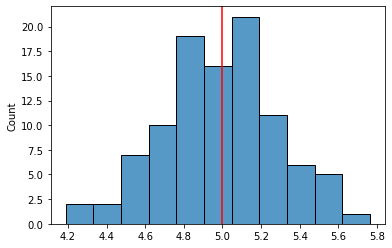

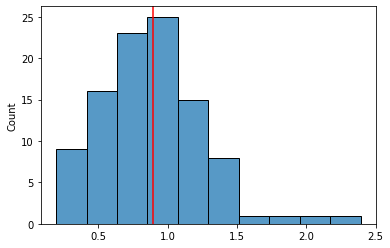

In [7]:
seaborn.histplot(column_sample_means)
pyplot.axvline(np.mean(column_sample_means), color= 'r' )
pyplot.show()


seaborn.histplot(column_sample_variances)
pyplot.axvline((np.mean(column_sample_variances)), color= 'r' )
pyplot.show()



---

## Problem 6 (10 pts)

Replicate the process from problems 4 and 5 but increase the size of each sample from 10 to 20. Print the mean of sample means, mean of sample variances, and mean of sample variances multiplied by $\frac{N}{N-1}$. Show the sample means and sample variances in separate histograms with a red line indicating the mean of the means/variances.

In the markdown cell below, describe what you noticed about sample mean and sample variance. Compare the histograms for $N=10$ and $N=20$. How are they similar or different? Pay attention to the $x$-axis.

---

column sample means
[4.73188136 5.07501196 5.26429636 5.30693253 5.27450466 4.80266781
 5.19390355 4.58412772 4.78922682 5.17252354 4.66576206 5.44491963
 5.10897896 5.17471432 4.98016343 5.17366843 4.75155437 4.94758736
 5.03863849 5.02308124 4.83100711 5.14907303 4.99690966 4.92245311
 4.96916207 4.85330116 4.76461393 4.84587527 5.38592796 4.80982165
 5.03915051 4.9107546  4.72511988 5.35671528 5.33646742 4.94952796
 5.34646945 5.33247186 5.35428516 4.31039471 4.83435188 4.77907436
 5.06025793 5.00939405 4.89031207 4.9698471  4.5972031  5.05140039
 4.91079741 4.97503332 5.33872584 5.00061996 4.97924312 5.31173645
 4.90329307 5.0512212  5.23637394 5.45696614 5.23292547 5.24170349
 4.99768499 4.77657199 4.87221821 5.17986932 5.24981649 5.25289516
 4.98716271 5.06514397 4.70603737 5.17740959 5.14555433 4.18134082
 4.77436322 5.18267571 4.72188941 5.13052755 5.13424282 4.84047826
 5.18769964 4.85717976 5.12754013 5.11531497 5.14107488 4.61177305
 4.89789424 5.16744076 5.01902455 4.938670

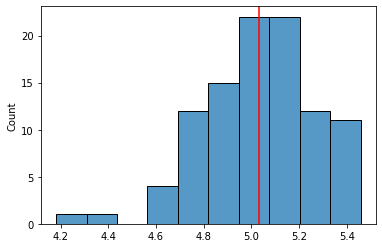

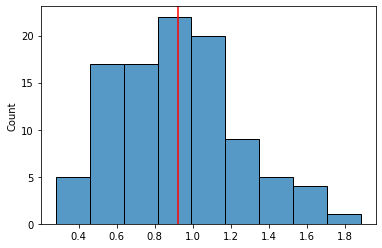

In [42]:
normal_samples = np.random.normal(5, 1, (20, 100))
print("column sample means")
column_sample_means = (normal_samples.mean(0)) 
print(column_sample_means) 
print("mean of means")
mean_of_means = np.mean(column_sample_means)
print (mean_of_means)

column_sample_variances = normal_samples.var(0) 
print ("column sample variances")
print (column_sample_variances)
print ("mean of variances")
print (np.mean(column_sample_variances))
print ("mean of variances (N-1)") 
print (np.mean(column_sample_variances)*20/19)

seaborn.histplot(column_sample_means)
pyplot.axvline(np.mean(column_sample_means), color= 'r' )
pyplot.show()


seaborn.histplot(column_sample_variances)
pyplot.axvline((np.mean(column_sample_variances)), color= 'r' )
pyplot.show()



**Describe your observations here**

the means and variances are approaching 5 and 1 respectively: the spread is narrower. 

---

## Problem 7 (10 pts)

In this problem we will consider some real data from Goodreads. We provide you with two data files, one containing information about 20 popular books and a second containing reviews of those books.

Load the CSV files into two pandas data frames called `books_df` and `reviews_df`. Print the `.shape` property of the two data frames. The zip file that contains this notebook will also contain the two CSV files in a subdirectory. You should include that directory in the file path when you load the data.

**Confidence check: The `shape` property of these data frames should be `((20, 17), (4770, 13))`**

Print the `book_title` column of the books data frame.

---

In [64]:
books_df =pd.read_csv('/Users/Nic/Desktop/Fall 2022/INFO 2950/week 2/hw1/data/all_books.csv')
reviews_df =pd.read_csv('/Users/Nic/Desktop/Fall 2022/INFO 2950/week 2/hw1/data/all_reviews.csv')



print(books_df.shape)
print(reviews_df.shape)
print(books_df.loc[:,"book_title"]) 

(20, 17)
(4770, 13)
0                                 Clockwork Angel
1                                     The Martian
2                                 Throne of Glass
3                            A Dance with Dragons
4                                      Mockingjay
5                                            Room
6                                          Wonder
7                                       Gone Girl
8                                       Insurgent
9                                       Divergent
10                                  Me Before You
11                                  The Lost Hero
12                               The Night Circus
13    Miss Peregrine's Home for Peculiar Children
14                                         Cinder
15                          The Girl on the Train
16                               Ready Player One
17                    All the Light We Cannot See
18                                  The Selection
19                            

---

## Problem 8 (10 pts)

Create a data frame `book_reviews_df` with a `%sql` cell. Use SQL to select all columns from the inner join of books_df and reviews_df where the `book_id` value is the same.

**Confidence check: this should display the string `Returning data to local variable book_reviews_df`**

Use the `columns` property to compare the columns of the new data frame to the columns of the two original data frames. In a markdown cell, list the columns that came from the books table, the columns that came from the reviews table, and the columns that were present in both tables.

In a SQL code cell, use a SQL statement to show the book title, author, and number of rows for each work (use the `COUNT` function with a `GROUP BY`), sorted in reverse alphabetical order by title. You will need to determine which fields to include in the `GROUP BY` statement.

**Hint: We know that all the rows with the same title have the same author, but SQL doesn't. To return a column in a query with a GROUP BY, that column either has to have an aggregation function like SUM or AVG, or it needs to appear in the GROUP BY clause**

---

In [10]:
import sys 
!{sys.executable} -m pip install ipython-sql

    


In [39]:
%sql book_reviews_df <<  SELECT * FROM books_df INNER JOIN reviews_df ON books_df.book_id = reviews_df.book_id

print(book_reviews_df.columns)
print(books_df.columns)
print(reviews_df.columns)


# #In a SQL code cell, use a SQL statement to show the book title, author, 
# and number of rows for each work (use the COUNT function with a GROUP BY), 
# sorted in reverse alphabetical order by title. You will need to determine which fields 
# to include in the GROUP BY statement.
# #Hint: We know that all the rows with the same title have the same author, 
# but SQL doesn't. To return a column in a query with a GROUP BY, that column 
# either has to have an aggregation function like SUM or AVG, or it needs to appear
# in the GROUP BY clause


%sql SELECT books_df.book_title, books_df.author, COUNT(books_df.author) AS numrow FROM books_df INNER JOIN reviews_df on books_df.book_id = reviews_df.book_id GROUP BY books_df.book_title, books_df.author ORDER BY books_df.book_title DESC 



Returning data to local variable book_reviews_df
Index(['book_id_title', 'book_id', 'book_title', 'book_series',
       'book_series_uri', 'isbn', 'isbn13', 'year_first_published', 'author',
       'num_pages', 'genres', 'shelves', 'lists', 'num_ratings', 'num_reviews',
       'average_rating', 'rating_distribution', 'book_id_title', 'book_id',
       'book_title', 'review_url', 'review_id', 'date', 'rating', 'user_name',
       'user_url', 'text', 'num_likes', 'sort_order', 'shelves'],
      dtype='object')
Index(['book_id_title', 'book_id', 'book_title', 'book_series',
       'book_series_uri', 'isbn', 'isbn13', 'year_first_published', 'author',
       'num_pages', 'genres', 'shelves', 'lists', 'num_ratings', 'num_reviews',
       'average_rating', 'rating_distribution'],
      dtype='object')
Index(['book_id_title', 'book_id', 'book_title', 'review_url', 'review_id',
       'date', 'rating', 'user_name', 'user_url', 'text', 'num_likes',
       'sort_order', 'shelves'],
      dtype='

,book_title,author,numrow
0,Wonder,R.J. Palacio,300
1,Throne of Glass,Sarah J. Maas,300
2,The Selection,Kiera Cass,180
3,The Night Circus,Erin Morgenstern,300
4,The Martian,Andy Weir,300
5,The Lost Hero,Rick Riordan,150
6,The Girl on the Train,Paula Hawkins,210
7,Room,Emma Donoghue,300
8,Ready Player One,Ernest Cline,210
9,Mockingjay,Suzanne Collins,300


 In a markdown cell, list the columns that came from the books table, the columns that came from the reviews table, and the columns that were present in both tables: 
 
Columns present in both: 
'book_id_title', 'book_id', 'book_title', n 'shelves'

Columns from books table: 
'book_series_uri', 'isbn', 'isbn13', 'year_first_published', 'author',
       'num_pages', 'genres', 'shelves', 'lists', 'num_ratings', 'num_reviews',
       'average_rating', 'rating_distribution'

Columns from reviews table: 
'review_url', 'review_id',
       'date', 'rating', 'user_name', 'user_url', 'text', 'num_likes',
       'sort_order',


 
 
 

---

## Problem 9 (10 pts)

Goodreads only lets us scrape at most 300 reviews for each book (oldest, newest, most highly rated). The `num_ratings` and `average_rating` fields in the books dataset record the total number of ratings and the average score.

Use a SQL SELECT query to get
* the book title
* the author name
* the total number of ratings in Goodreads (ie `num_ratings`)
* the average rating (ie `average_rating`)
* the mean of each review's `rating` for the reviews in our data set as `sample_average`
* the standard deviation of each review's `rating` as `sample_std`

Sort the output by the sample average in descending order. You will also need to determine which columns to include in the GROUP BY statement.

In a markdown cell, describe any differences between the overall average rating and the average ratings in our sample. Compare the size of the sample to the total. Comment on whether you think this sample is representative, and why.

---

In [71]:
%sql SELECT books_df.book_title, books_df.author, books_df.num_ratings, \
books_df.average_rating, AVG(rating) AS sample_average, STDDEV(rating) AS sample_std,\
FROM books_df INNER JOIN reviews_df on books_df.book_id = reviews_df.book_id\
GROUP BY books_df.book_title, books_df.author, num_ratings, average_rating, ORDER BY AVG(rating) DESC 

,book_title,author,num_ratings,average_rating,sample_average,sample_std
0,Wonder,R.J. Palacio,959488,4.39,4.491582,0.858638
1,Me Before You,Jojo Moyes,1425019,4.26,4.286689,1.104037
2,The Martian,Andy Weir,981701,4.41,4.178451,1.035750
3,Clockwork Angel,Cassandra Clare,774774,4.31,4.126280,1.000561
4,The Lost Hero,Rick Riordan,745475,4.32,4.110345,0.874938
5,All the Light We Cannot See,Anthony Doerr,1336192,4.32,4.078212,1.191979
6,Cinder,Marissa Meyer,827752,4.13,4.040678,1.045743
7,Ready Player One,Ernest Cline,1037697,4.24,4.033493,1.190438
8,The Night Circus,Erin Morgenstern,843432,4.03,3.944637,1.183090
9,Room,Emma Donoghue,774026,4.07,3.817568,1.144106


In a markdown cell, describe any differences between the overall average rating and the average ratings in our sample. Compare the size of the sample to the total. Comment on whether you think this sample is representative, and why.


the sample average has a larger variance than the overall average and that's because you take a sample and it is thus a smaller subset of the total. I think the sample average is generally an OK and useable metric but obviously not as good as the overall average-- it gives you a generally good overview of the total average rating and you're able to use to to compare and sort the books. 

---

## Problem 10 (10 pts)

This is a challenging problem that will require you to consult documentation.

Create a new data frame `four_books` containing only the ratings for four book titles, which you may select yourself. **Remember to use single quotes `'` for strings in SQL, not double quotes `"`. Otherwise you will get a RuntimeError stating that a column is missing.**

Use a seaborn `FacetGrid` with `book_title` as the columns and `rating` as the `x` variable to display histograms for each book. See the [documentation for FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for examples.

**Hint: In most cases we have called a function from the seaborn package and passed arguments to that function specifying which variables to use for attributes. For a FacetGrid we first specify the variable to use to divide into multiple sub-plots, then use `map()` to tell seaborn what to put into each sub-plot. Instad of *calling* the function `histplot` we will pass the function itself as an argument.**

In a markdown cell, describe the differences and similarities between the distribution of ratings for each of the books.

---

Returning data to local variable four_books


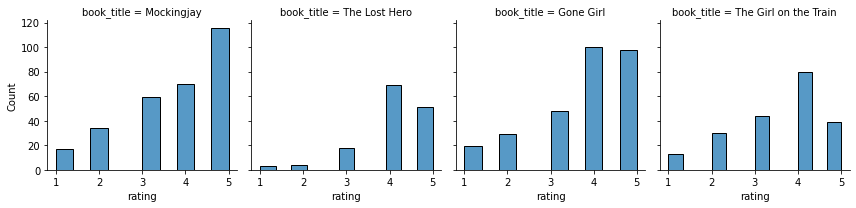

In [62]:
%sql four_books << SELECT * FROM book_reviews_df WHERE book_title IN ('The Lost Hero', 'Mockingjay', 'The Girl on the Train', 'Gone Girl' )

g = sns.FacetGrid(four_books, col="book_title")
g.map_dataframe(sns.histplot, x="rating")



In a markdown cell, describe the differences and similarities between the distribution of ratings for each of the books.


All books have a distribution of rating ranging from 1-5, but it is clear that not all books ranked the same. For example, "The Lost Hero" has the fewest bad and also not as many high reviews when compared to the other books, but overall the highest  